# Computer Vision Contours

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

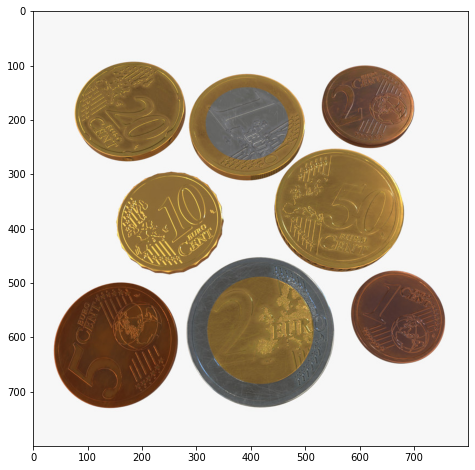

In [9]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)
coins_rgb = rgb_coins.copy()

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

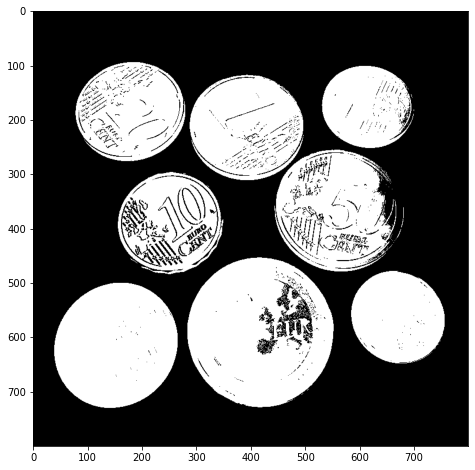

In [10]:
# Convert the image above to grayscale
gray_scale = cv2.cvtColor(coins_rgb,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray_scale,127,255,cv2.THRESH_BINARY_INV)


plt.figure(figsize = (12,8))
plt.imshow(thresh,cmap = 'gray');




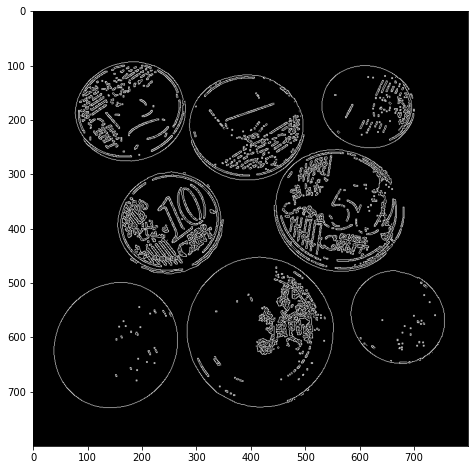

In [11]:
# Apply some gaussian blur to it (try differente size kernels)
gaussian_blur = cv2.GaussianBlur(thresh,(3,3),0)
# Apply Canny to find edges and display the image 
canny = cv2.Canny(gaussian_blur,70,140)
plt.figure(figsize = (12,8))
plt.imshow(canny,cmap = 'gray');

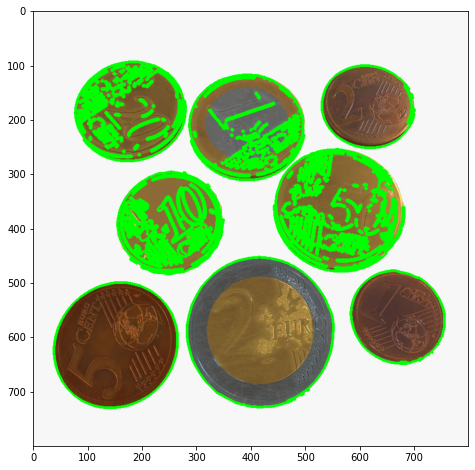

In [12]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?

canny_copy = canny.copy()

coin_contours, hierarachy = cv2.findContours(canny_copy,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(coins_rgb,coin_contours,-1,(0,255,0),3)
plt.figure(figsize = (12,8))
plt.imshow(coins_rgb,cmap = 'gray');


[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [13]:
# print the number of contours that has been found
len(coin_contours)

481

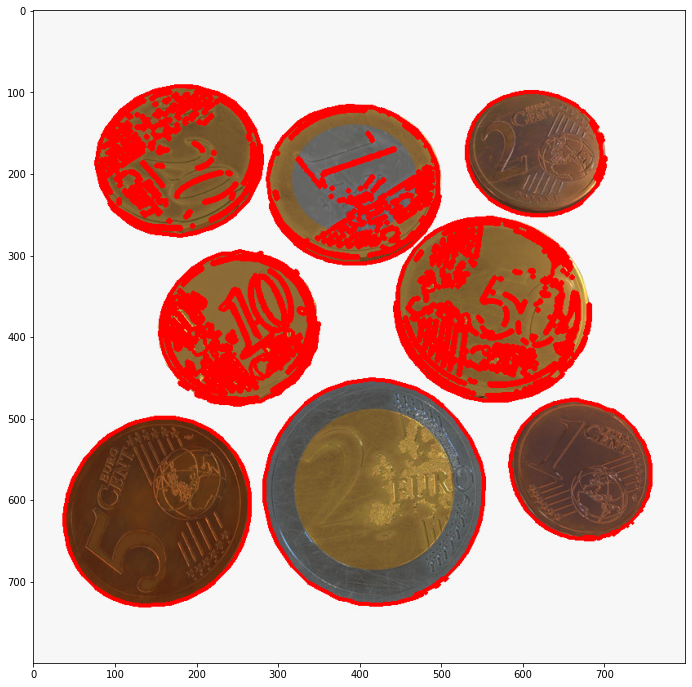

In [17]:
color_coins_copy = color_coins.copy() 
accuracy = 0.001
for contour in coin_contours:
    perimeter = cv2.arcLength(contour,True)
    epsilon = perimeter * accuracy
    approx = cv2.approxPolyDP(contour,epsilon,True)
    cv2.drawContours(color_coins_copy,[approx],-1,(0,0,255),3)
plt.figure(figsize = (12,12))
plt.imshow(color_coins_copy[:,:,::-1])

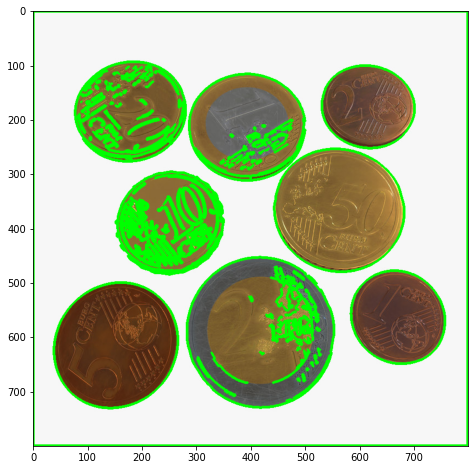

In [58]:
gray_scale_copy = gray_scale.copy()

coin_contours_gray, hierarachy = cv2.findContours(gray_scale_copy,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(coins_rgb,coin_contours_gray,-1,(0,255,0),3)
plt.figure(figsize = (12,8))
plt.imshow(coins_rgb,cmap = 'gray');

In [59]:
len(coin_contours_gray)

1

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

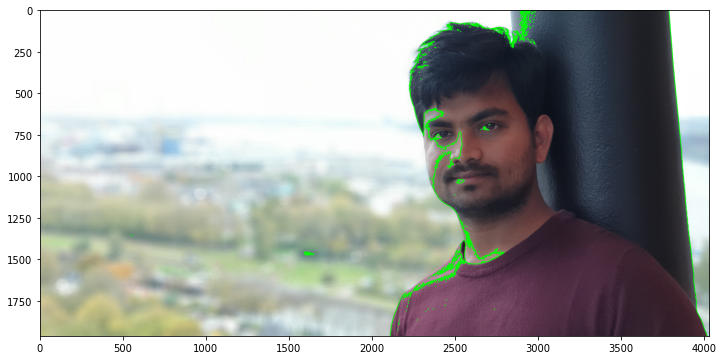

In [36]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise
bgr_image = cv2.imread('img/photo.jpg')
gray_img = cv2.cvtColor(bgr_image,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray_img,125,255,cv2.THRESH_BINARY_INV)
gray_img_copy = gray_img.copy()
rgb_image_copy = rgb_image.copy()
gauss_blur = cv2.GaussianBlur(thresh,(3,3),0)
canny = cv2.Canny(gauss_blur,85,150)
canny_copyy = canny.copy()

contours,hieraracy = cv2.findContours(canny_copyy,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(bgr_image,contours,-1,(0,255,0),3)
plt.figure(figsize = (12,8))
plt.imshow(bgr_image[:,:,::-1],cmap = 'gray');

In [37]:
len(contours)

597

## Sorting Contours

### By area

In [38]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [39]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var
cv = get_contour_areas(coin_contours)

In [40]:
# Print the contour areas to screen
cv

[0.5,
 1.5,
 1.0,
 0.0,
 0.0,
 41011.0,
 22791.5,
 0.0,
 1.0,
 1.0,
 3.5,
 48.0,
 0.5,
 4.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 8.0,
 57799.5,
 4.0,
 16.5,
 12.5,
 1.0,
 0.0,
 45.5,
 2.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.5,
 6.0,
 9.0,
 35.5,
 2.0,
 0.0,
 0.0,
 0.0,
 72.0,
 1.0,
 3.0,
 0.0,
 0.0,
 943.0,
 1.0,
 0.0,
 205.0,
 9.0,
 3.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 1.0,
 1.0,
 157.0,
 36.5,
 0.0,
 79.5,
 0.0,
 302.5,
 35.5,
 6.0,
 0.0,
 0.0,
 259.0,
 6.0,
 18.0,
 0.0,
 0.0,
 5.5,
 1.0,
 0.5,
 4.0,
 2.0,
 0.0,
 0.0,
 4.0,
 32.0,
 0.5,
 0.0,
 0.0,
 68.0,
 0.5,
 62.0,
 10.5,
 1.0,
 3.5,
 0.0,
 0.5,
 8.0,
 110.0,
 2.0,
 0.0,
 0.0,
 7.5,
 9.5,
 10.0,
 93.5,
 0.5,
 216.0,
 0.0,
 16.0,
 41.5,
 177.5,
 0.0,
 322.0,
 39.5,
 19.5,
 237.0,
 0.0,
 3.5,
 0.0,
 59.5,
 50.5,
 0.0,
 0.0,
 2.5,
 0.5,
 1.0,
 55.0,
 3.5,
 1.0,
 25.5,
 0.5,
 0.5,
 2.0,
 1.0,
 0.0,
 0.0,
 4.0,
 0.0,
 54.0,
 0.0,
 5.5,
 84.0,
 251.0,
 0.0,
 4.0,
 0.0,
 62.0,
 46.0,
 8.0,
 6.0,
 5.5,
 6.0,
 0

In [21]:
# Now sort the areas by biggest to smallest and print the sorted areas
descend_sort = sorted(coin_contours,key = cv2.contourArea,reverse = True)
descend_sort


[array([[[414, 452]],
 
        [[413, 453]],
 
        [[412, 453]],
 
        ...,
 
        [[417, 452]],
 
        [[416, 452]],
 
        [[415, 452]]], dtype=int32),
 array([[[149, 499]],
 
        [[148, 500]],
 
        [[147, 500]],
 
        ...,
 
        [[152, 499]],
 
        [[151, 499]],
 
        [[150, 499]]], dtype=int32),
 array([[[657, 477]],
 
        [[656, 478]],
 
        [[655, 478]],
 
        ...,
 
        [[660, 477]],
 
        [[659, 477]],
 
        [[658, 477]]], dtype=int32),
 array([[[601, 100]],
 
        [[600, 101]],
 
        [[599, 101]],
 
        [[598, 101]],
 
        [[597, 101]],
 
        [[596, 101]],
 
        [[595, 101]],
 
        [[594, 102]],
 
        [[593, 102]],
 
        [[592, 102]],
 
        [[591, 102]],
 
        [[590, 102]],
 
        [[589, 103]],
 
        [[588, 103]],
 
        [[587, 103]],
 
        [[586, 103]],
 
        [[585, 104]],
 
        [[584, 104]],
 
        [[583, 104]],
 
        [[582, 105]],
 
    

[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [66]:
# # Now sort the areas in the opposite way smallest to biggest and print the sorted areas
# sort = sorted(coin_contours,key = cv2.contourArea)
# sort

In [22]:
# Filter out only the 5 biggest contours and print them
coin_contour = descend_sort[:5]
len(coin_contour)

5

[Hint](# "Just slice the array!") 

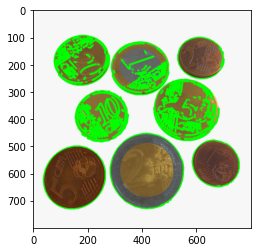

In [24]:
# Now in a clean image draw the contours you just filtered out and display it
cv2.drawContours(coins_rgb,coin_contour,-1,(0,255,0),2)
plt.imshow(coins_rgb);

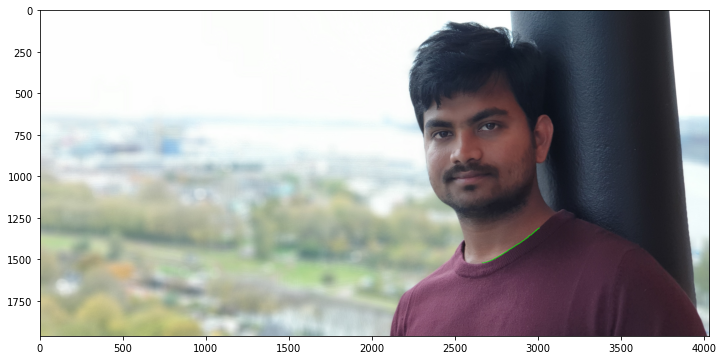

In [45]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!
descending_sort = sorted(contours,key = cv2.contourArea,reverse = True)
contour = descending_sort[:6]

rgb_image_copy = rgb_image.copy()
cv2.drawContours(rgb_image_copy,contour,1,(0,255,0),2)
plt.figure(figsize = (12,8))
plt.imshow(rgb_image_copy);

### By X coordinate (left to right)

In [41]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [45]:
def imshow(image):
    plt.figure(figsize = (12,8))
    plt.imshow(image[:,:,::-1])

In [43]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right
sort_cont_x = sorted(coin_contour,key =get_contour_x_center_coordinate)

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\drawing.cpp:2498: error: (-215:Assertion failed) 0 <= contourIdx && contourIdx < (int)last in function 'cv::drawContours'


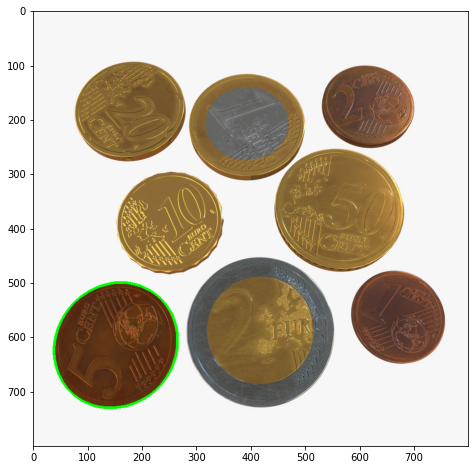

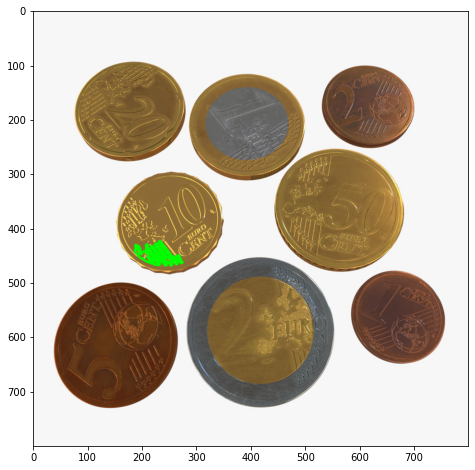

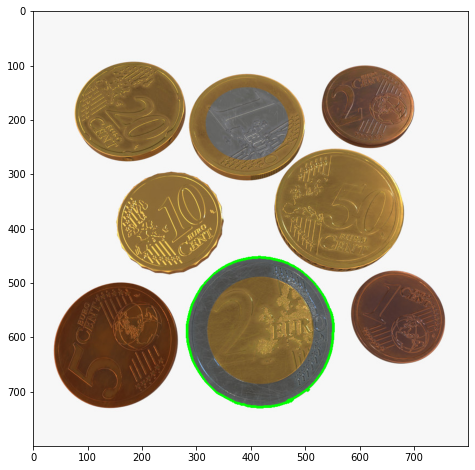

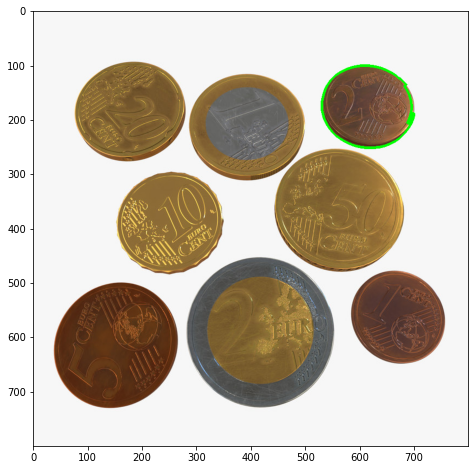

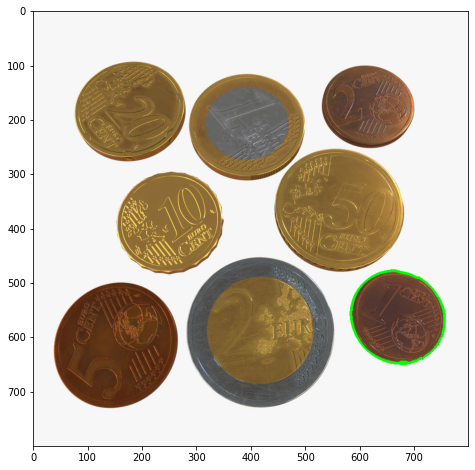

In [46]:
# Draw the contours one at a time and display the images on screen 
coins_copy = color_coins.copy()
for i in range(8):
    cv2.drawContours(coins_copy,sort_cont_x,i,(0,255,0),3)
    imshow(coins_copy)
    coins_copy = color_coins.copy()
    
    

[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
